In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
path='/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv'

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [54]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

In [55]:
data=pd.read_csv(path)

In [57]:
gender_map={'Male':0,'Female':1}
data['Gender']=data['Gender'].replace(gender_map)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [58]:
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


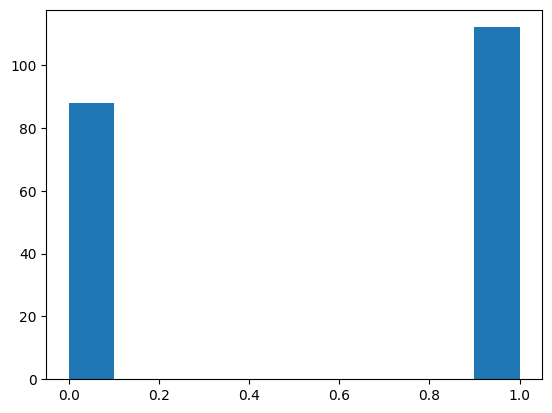

In [59]:
plt.hist(data['Gender'])
plt.show()

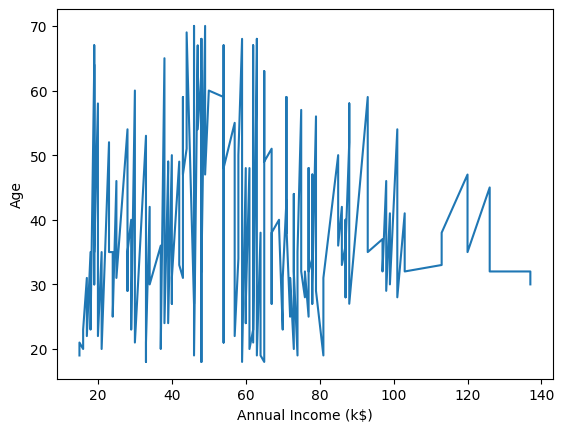

In [87]:
plt.plot(data['Annual Income (k$)'],data['Age'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

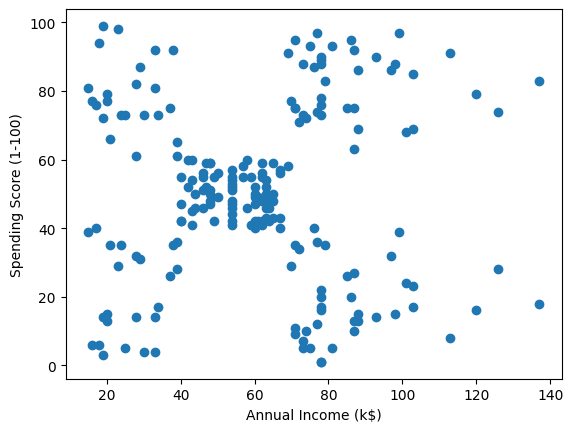

In [62]:
plt.scatter(data['Annual Income (k$)'],data['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

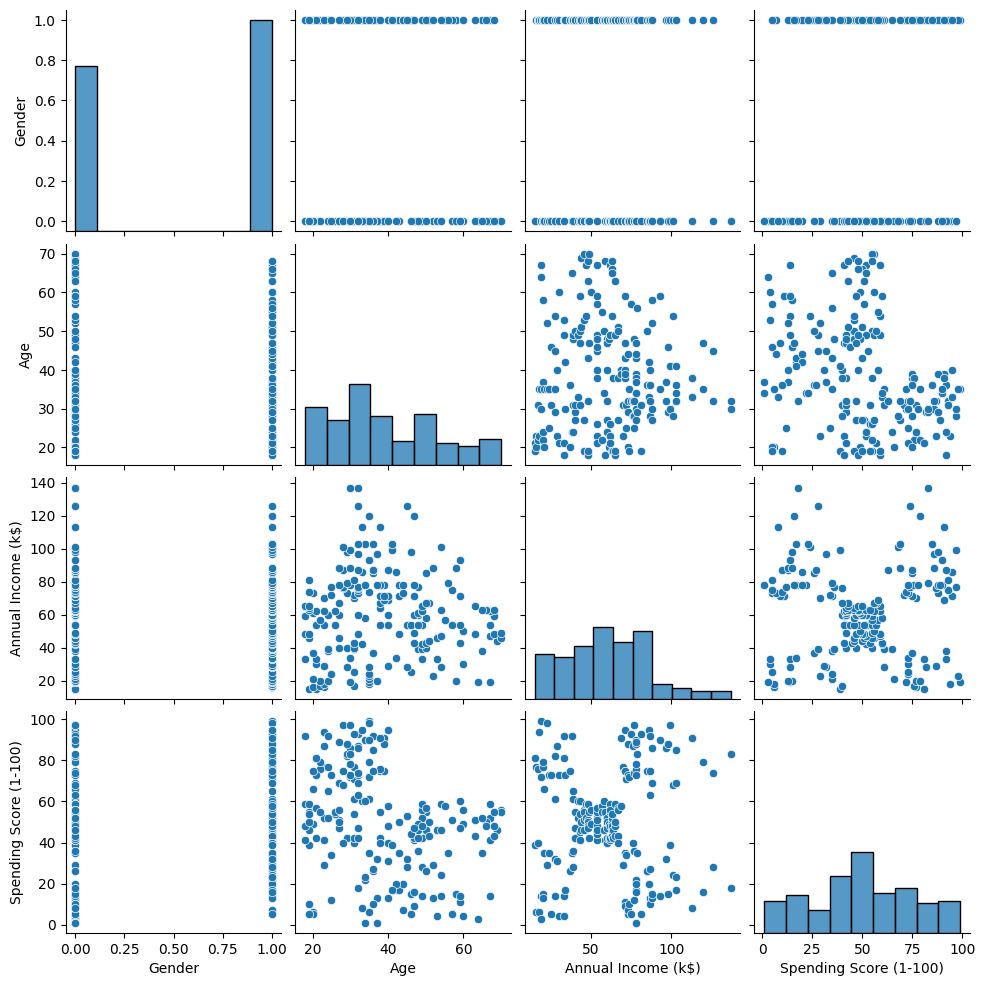

In [63]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    temp=data[['Gender', 'Age', 'Annual Income (k$)',
           'Spending Score (1-100)']]
    sns.pairplot(temp)

# Some Conclusions:
1. High age -> low spending score (inversely)
2. Relationship between Annual Income and Spending Score(1-100)
    for income(40-70) -> avg spending score
        income(less or high) -> either high or low spending score

In [64]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# **Let's determine the appropriate features optimal number of clusters for that features**

# Starting from the features that seem to be **important**

In [81]:
interesting_features1=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
X_train1=np.array(data[interesting_features1])

Optimal number of clusters: 8
Gap Statistic for optimal number of clusters: 0.6807873548280767


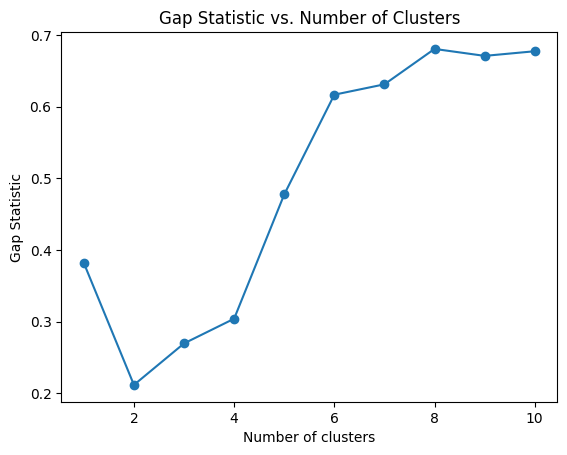

In [82]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    def compute_wcss(data, kmeans):
        wcss = 0
        for i in range(kmeans.n_clusters):
            cluster_points = data[kmeans.labels_ == i]
            centroid = kmeans.cluster_centers_[i]
            wcss += np.sum((cluster_points - centroid) ** 2)
        return wcss

    def generate_reference_data(data):
        mins = data.min(axis=0)
        maxs = data.max(axis=0)
        return np.random.uniform(mins, maxs, size=data.shape)

    def gap_statistic(data, max_k=10):
        gaps = np.zeros(max_k)
        for k in range(1, max_k + 1):
            kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
            wcss = compute_wcss(data, kmeans)

            # Generate reference data
            reference_wcss = np.zeros(10)
            for i in range(10):
                reference_data = generate_reference_data(data)
                kmeans_ref = KMeans(n_clusters=k, random_state=0).fit(reference_data)
                reference_wcss[i] = compute_wcss(reference_data, kmeans_ref)

            gap = np.log(np.mean(reference_wcss)) - np.log(wcss)
            gaps[k - 1] = gap

        optimal_k = np.argmax(gaps) + 1
        return optimal_k, gaps

    # Calculate the optimal number of clusters
    optimal_k, gaps = gap_statistic(X_train1, max_k=10)

    print('Optimal number of clusters:', optimal_k)
    print('Gap Statistic for optimal number of clusters:', gaps[optimal_k - 1])

    # Plot the gap statistic
    plt.plot(range(1, 11), gaps, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Gap Statistic')
    plt.title('Gap Statistic vs. Number of Clusters')
    plt.show()

In [48]:
model.cluster_centers_

array([[40.39473684, 87.        , 18.63157895],
       [32.69230769, 86.53846154, 82.12820513],
       [44.89473684, 48.70526316, 42.63157895],
       [24.82142857, 28.71428571, 74.25      ]])

# Trying **Gender** 

Optimal number of clusters: 10
Gap Statistic for optimal number of clusters: 0.6849069468327933


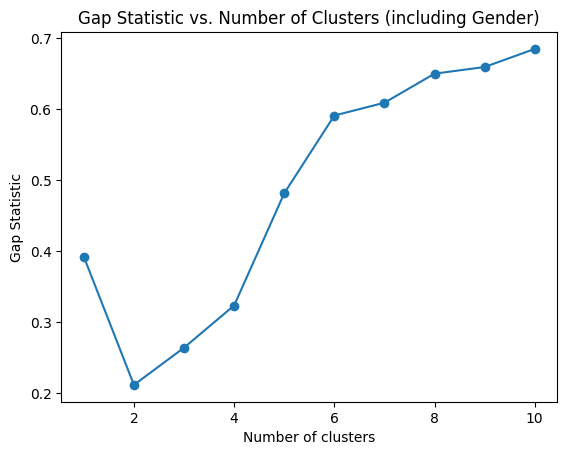

In [83]:
interesting_features2=['Age', 'Annual Income (k$)',
       'Spending Score (1-100)','Gender']
X_train2=np.array(data[interesting_features2])


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    def compute_wcss(data, kmeans):
        wcss = 0
        for i in range(kmeans.n_clusters):
            cluster_points = data[kmeans.labels_ == i]
            centroid = kmeans.cluster_centers_[i]
            wcss += np.sum((cluster_points - centroid) ** 2)
        return wcss

    def generate_reference_data(data):
        mins = data.min(axis=0)
        maxs = data.max(axis=0)
        return np.random.uniform(mins, maxs, size=data.shape)

    def gap_statistic(data, max_k=10):
        gaps = np.zeros(max_k)
        for k in range(1, max_k + 1):
            kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
            wcss = compute_wcss(data, kmeans)

            # Generate reference data
            reference_wcss = np.zeros(10)
            for i in range(10):
                reference_data = generate_reference_data(data)
                kmeans_ref = KMeans(n_clusters=k, random_state=0).fit(reference_data)
                reference_wcss[i] = compute_wcss(reference_data, kmeans_ref)

            gap = np.log(np.mean(reference_wcss)) - np.log(wcss)
            gaps[k - 1] = gap

        optimal_k = np.argmax(gaps) + 1
        return optimal_k, gaps

    # Calculate the optimal number of clusters
    optimal_k, gaps = gap_statistic(X_train2, max_k=10)

    print('Optimal number of clusters:', optimal_k)
    print('Gap Statistic for optimal number of clusters:', gaps[optimal_k - 1])

    # Plot the gap statistic
    plt.plot(range(1, 11), gaps, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Gap Statistic')
    plt.title('Gap Statistic vs. Number of Clusters (including Gender)')
    plt.show()

# Conclusion
As we can see there is no significant difference in the gap statistic score of including gender and not including it....we'll go **without gender**

In [85]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    X_train=np.array(data[interesting_features1])
    model1=KMeans(n_clusters=4, random_state=0).fit(X_train1)
    
model1.cluster_centers_

array([[40.39473684, 87.        , 18.63157895],
       [32.69230769, 86.53846154, 82.12820513],
       [44.89473684, 48.70526316, 42.63157895],
       [24.82142857, 28.71428571, 74.25      ]])